# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)
estado_valvula_co2 =  np.array([])
estado_valvula_compost = np.array([])
temp_suncho = np.array([])
temp_compost = np.array([])
estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/full/2021-10-24_20-48-22"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2,Estado_Valvula_Compost,Temp_Compost,Temp_Suncho,Estado_Suncho
0,24/10/2021_20:48:24,360,Apagado,Prendido,57.13,54.69,Apagado
1,24/10/2021_20:48:30,521,Apagado,Prendido,57.06,54.50,Apagado
2,24/10/2021_20:48:35,573,Apagado,Prendido,57.06,54.25,Apagado
3,24/10/2021_20:48:41,719,Apagado,Prendido,57.00,54.13,Apagado
4,24/10/2021_20:48:47,769,Apagado,Prendido,57.06,53.88,Apagado
...,...,...,...,...,...,...,...
95,24/10/2021_20:57:18,457,Apagado,Prendido,55.94,52.25,Apagado
96,24/10/2021_20:57:24,458,Apagado,Prendido,55.81,52.13,Apagado
97,24/10/2021_20:57:29,460,Apagado,Prendido,55.88,52.00,Prendido
98,24/10/2021_20:57:35,460,Apagado,Prendido,55.88,52.00,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

24/10/2021_20:48:24


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

90


In [7]:
df = pd.read_csv(f"{PATH}/data_0.csv")
co2 = np.transpose(df["CO2"].to_numpy())

display(co2)
print(type(co2))

array([360, 521, 573, 719, 769, 768, 769, 680, 588, 529, 505, 495, 485,
       468, 460, 458, 455, 452, 452, 451, 450, 445, 443, 442, 441, 440,
       439, 439, 437, 436, 435, 432, 432, 432, 432, 433, 432, 432, 431,
       430, 431, 430, 428, 428, 427, 427, 427, 428, 427, 426, 426, 426,
       425, 425, 425, 426, 426, 426, 425, 425, 425, 425, 423, 422, 422,
       423, 423, 425, 430, 430, 432, 433, 435, 436, 435, 438, 445, 446,
       448, 449, 449, 449, 451, 452, 453, 453, 452, 453, 455, 457, 458,
       457, 457, 457, 457, 457, 458, 460, 460, 461])

<class 'numpy.ndarray'>


In [8]:
# Llenemos las listas con los datos
for i in range(n - 1):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost = np.concatenate((temp_compost, np.transpose(df["Temp_Compost"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2 = np.concatenate((estado_valvula_co2, np.array([1])))
        else:
            estado_valvula_co2 = np.concatenate((estado_valvula_co2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost = np.concatenate((estado_valvula_compost, np.array([1])))
        else:
            estado_valvula_compost = np.concatenate((estado_valvula_compost, np.array([0])))
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

#co2[np.where(co2=="!Warning: Clearing Byte: 145")[0][0]]=-1 #cuando tire error, que le asigne el valor -1
#co2[np.where(co2=="!Warning: Clearing Byte: 239")[0][0]]=-1 #cuando tire error, que le asigne el valor -1
co2[np.where(co2=="!Warning: Clearing Byte: 248")[0][0]]=-1 #cuando tire error, que le asigne el valor -1

# Gráficos

<IPython.core.display.Javascript object>


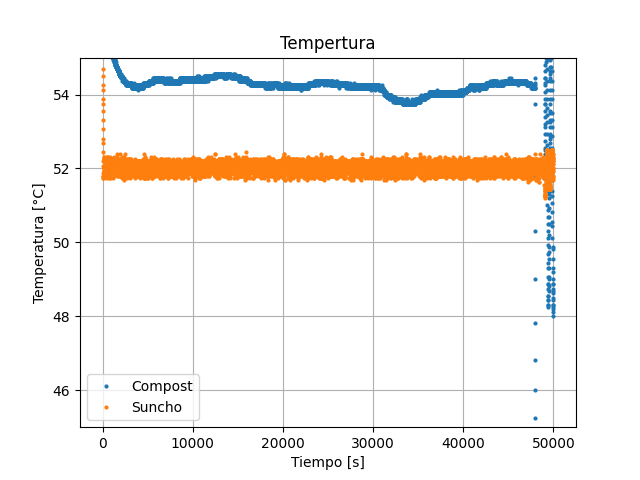

In [9]:
plt.figure("Temperatura")
plt.title("Tempertura")
plt.plot(tiempos, temp_compost, '.', markersize=4, label='Compost')
plt.plot(tiempos, temp_suncho, '.', markersize=4, label='Suncho')
plt.legend()
plt.ylim(45,55)
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

<IPython.core.display.Javascript object>


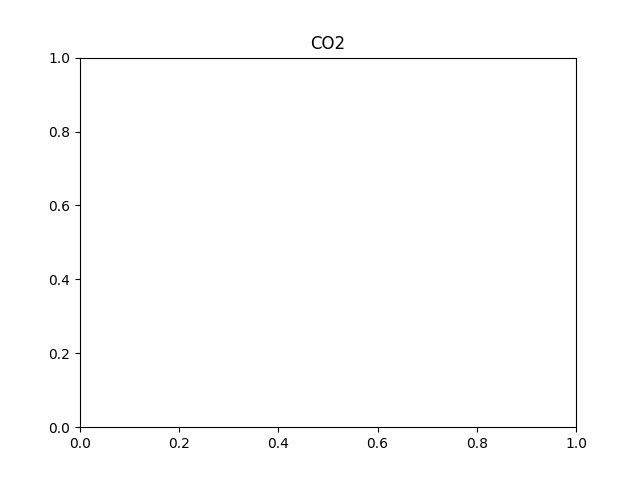

ValueError: x and y must have same first dimension, but have shapes (8900,) and (9000,)

In [10]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, '.', markersize=4)
plt.grid()
#plt.ylim(0,420)
#plt.xlim(30000,40000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
#plt.savefig(f"{PATH}/figuras/CO2.png")
plt.show()